# XBD Dataset Analysis

In [1]:
import sys
sys.path.append("../src")
from utils.common.pathManager import FilePath
from collections import defaultdict
from shapely import wkt
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from cv2 import imread
import pandas as pd
path = FilePath("/media/mrtc101/Martín SSD/tesis/datasets/xBD")
print(path.get_folder_names())

['hold', 'test', 'tier3', 'train']


## Count Tiles

In [2]:
count_types = defaultdict(lambda : 0)
for split_folder in path.get_folder_paths():
    for folder in split_folder.get_folder_names():
        if(folder == "images"):
            split_path = split_folder.join(folder)
            for file in split_path.get_files_names():
                if file.find("pre") > -1:
                    prefix = file.split("_")[0]
                    count_types[prefix] += 1
count_list = [(t,n) for t,n in count_types.items()]
count_list

[('guatemala-volcano', 28),
 ('hurricane-florence', 546),
 ('midwest-flooding', 445),
 ('socal-fire', 1403),
 ('hurricane-matthew', 405),
 ('hurricane-harvey', 522),
 ('hurricane-michael', 550),
 ('santa-rosa-wildfire', 377),
 ('palu-tsunami', 196),
 ('mexico-earthquake', 193),
 ('joplin-tornado', 149),
 ('lower-puna-volcano', 291),
 ('moore-tornado', 227),
 ('nepal-flooding', 619),
 ('pinery-bushfire', 1845),
 ('portugal-wildfire', 1869),
 ('sunda-tsunami', 148),
 ('tuscaloosa-tornado', 343),
 ('woolsey-fire', 878)]

In [3]:
tile_count = pd.DataFrame(count_list, columns=["Disaster", "Tile_count"]).sort_values(by="Tile_count")
tile_count

Disaster  Tile_count
0     guatemala-volcano          28
16        sunda-tsunami         148
10       joplin-tornado         149
9     mexico-earthquake         193
8          palu-tsunami         196
12        moore-tornado         227
11   lower-puna-volcano         291
17   tuscaloosa-tornado         343
7   santa-rosa-wildfire         377
4     hurricane-matthew         405
2      midwest-flooding         445
5      hurricane-harvey         522
1    hurricane-florence         546
6     hurricane-michael         550
13       nepal-flooding         619
18         woolsey-fire         878
3            socal-fire        1403
14      pinery-bushfire        1845
15    portugal-wildfire        1869

In [4]:
disaster_types = {
    "guatemala-volcano": "Volcanic Eruption",
    "lower-puna-volcano" : "Volcanic Eruption",
    "midwest-flooding" : "Flooding",
    "nepal-flooding" : "Flooding",
    "sunda-tsunami": "Earthquake/Tsunami",
    "mexico-earthquake":"Earthquake/Tsunami",
    "palu-tsunami":"Earthquake/Tsunami",
    "santa-rosa-wildfire" : "Wildfire",
    "woolsey-fire" : "Wildfire",
    "socal-fire" : "Wildfire",
    "pinery-bushfire" : "Wildfire",
    "portugal-wildfire" :"Wildfire",
    "tuscaloosa-tornado" : "Tornado/Huracane",
    "moore-tornado": "Tornado/Huracane",
    "joplin-tornado": "Tornado/Huracane",
    "hurricane-matthew" : "Tornado/Huracane",
    "hurricane-harvey" : "Tornado/Huracane", 
    "hurricane-florence" : "Tornado/Huracane",
    "hurricane-michael" : "Tornado/Huracane",
}
tile_count["disaster_type"] = tile_count["Disaster"].apply(func=lambda x: disaster_types[x])
tile_count

Disaster  Tile_count       disaster_type
0     guatemala-volcano          28   Volcanic Eruption
16        sunda-tsunami         148  Earthquake/Tsunami
10       joplin-tornado         149    Tornado/Huracane
9     mexico-earthquake         193  Earthquake/Tsunami
8          palu-tsunami         196  Earthquake/Tsunami
12        moore-tornado         227    Tornado/Huracane
11   lower-puna-volcano         291   Volcanic Eruption
17   tuscaloosa-tornado         343    Tornado/Huracane
7   santa-rosa-wildfire         377            Wildfire
4     hurricane-matthew         405    Tornado/Huracane
2      midwest-flooding         445            Flooding
5      hurricane-harvey         522    Tornado/Huracane
1    hurricane-florence         546    Tornado/Huracane
6     hurricane-michael         550    Tornado/Huracane
13       nepal-flooding         619            Flooding
18         woolsey-fire         878            Wildfire
3            socal-fire        1403            Wildfire
14      pinery-bushfire        1845            Wildfire
15    portugal-wildfire        1869            Wildfire

In [5]:
tile_grouped_count = tile_count.groupby('disaster_type') \
    .apply(lambda x: pd.Series(x['Tile_count'].values, index=x['Disaster']),
            include_groups=False)
tile_grouped_count

disaster_type       Disaster           
Earthquake/Tsunami  sunda-tsunami           148
                    mexico-earthquake       193
                    palu-tsunami            196
Flooding            midwest-flooding        445
                    nepal-flooding          619
Tornado/Huracane    joplin-tornado          149
                    moore-tornado           227
                    tuscaloosa-tornado      343
                    hurricane-matthew       405
                    hurricane-harvey        522
                    hurricane-florence      546
                    hurricane-michael       550
Volcanic Eruption   guatemala-volcano        28
                    lower-puna-volcano      291
Wildfire            santa-rosa-wildfire     377
                    woolsey-fire            878
                    socal-fire             1403
                    pinery-bushfire        1845
                    portugal-wildfire      1869
dtype: int64

## Taking a look at a label JSON

Examine one JSON file in the `labels` folder...

In [6]:
json_files = defaultdict(lambda : [])
for split_name in path.get_folder_names():
    split_folder = path.join(split_name)
    for file_folder in split_folder.get_folder_names():
        if(file_folder == "labels"):
            folder_path = split_folder.join(file_folder)
            for json_name in folder_path.get_files_names():
                prefix = json_name.split("_")[0]
                img_path = folder_path.join(json_name)
                json_files[prefix].append(img_path)
json_files

defaultdict(<function __main__.<lambda>()>,
            {'guatemala-volcano': ['/media/mrtc101/Martín SSD/tesis/datasets/xBD/hold/labels/guatemala-volcano_00000004_post_disaster.json',
              '/media/mrtc101/Martín SSD/tesis/datasets/xBD/hold/labels/guatemala-volcano_00000004_pre_disaster.json',
              '/media/mrtc101/Martín SSD/tesis/datasets/xBD/hold/labels/guatemala-volcano_00000012_post_disaster.json',
              '/media/mrtc101/Martín SSD/tesis/datasets/xBD/hold/labels/guatemala-volcano_00000012_pre_disaster.json',
              '/media/mrtc101/Martín SSD/tesis/datasets/xBD/hold/labels/guatemala-volcano_00000014_post_disaster.json',
              '/media/mrtc101/Martín SSD/tesis/datasets/xBD/hold/labels/guatemala-volcano_00000014_pre_disaster.json',
              '/media/mrtc101/Martín SSD/tesis/datasets/xBD/hold/labels/guatemala-volcano_00000020_post_disaster.json',
              '/media/mrtc101/Martín SSD/tesis/datasets/xBD/hold/labels/guatemala-volcano_00000020

In [7]:
example_path_post = json_files['joplin-tornado'][0]
example_path_pre = json_files['joplin-tornado'][1]
print(example_path_post)
print(example_path_pre)

/media/mrtc101/Martín SSD/tesis/datasets/xBD/tier3/labels/joplin-tornado_00000000_post_disaster.json
/media/mrtc101/Martín SSD/tesis/datasets/xBD/tier3/labels/joplin-tornado_00000000_pre_disaster.json


In [8]:
example_post = example_path_post.read_json()

def recurrent(k,element):
    if isinstance(element, dict):
        print(f"{k} dict: ", list(element.keys()))
        for k in element.keys():
            recurrent(k,element[k])
    if isinstance(element, list):
        print(f"{k} list length: {len(element)}")
recurrent("example", example_post)

example dict:  ['features', 'metadata']
features dict:  ['lng_lat', 'xy']
lng_lat list length: 185
xy list length: 185
metadata dict:  ['sensor', 'provider_asset_type', 'gsd', 'capture_date', 'off_nadir_angle', 'pan_resolution', 'sun_azimuth', 'sun_elevation', 'target_azimuth', 'disaster', 'disaster_type', 'catalog_id', 'original_width', 'original_height', 'width', 'height', 'id', 'img_name']


Pre-disaster labels have no `subtype` filed or label assigned. We assume all labels are `1 - 'no damage'`

In [9]:
building = example_post['features']['xy'][0]
recurrent("building", building)
print(building['properties'])

building dict:  ['properties', 'wkt']
properties dict:  ['feature_type', 'subtype', 'uid']
{'feature_type': 'building', 'subtype': 'destroyed', 'uid': 'b6aa615e-56b2-458a-b404-d094b64dcad3'}


In [10]:
example_pre = example_path_pre.read_json()
recurrent("building", example_pre['features']['xy'][0])
example_pre['features']['xy'][0]['properties']
#NO SUBTYPE KEY

building dict:  ['properties', 'wkt']
properties dict:  ['feature_type', 'uid']


{'feature_type': 'building', 'uid': 'b6aa615e-56b2-458a-b404-d094b64dcad3'}

In [11]:
example_post['metadata']

{'sensor': 'WORLDVIEW02',
 'provider_asset_type': 'WORLDVIEW02',
 'gsd': 2.35255861282349,
 'capture_date': '2011-05-29T17:29:25.433Z',
 'off_nadir_angle': 28.4302768707275,
 'pan_resolution': 0.585882604122162,
 'sun_azimuth': 143.603851318359,
 'sun_elevation': 71.8531799316406,
 'target_azimuth': 193.251083374023,
 'disaster': 'joplin-tornado',
 'disaster_type': 'wind',
 'catalog_id': '103001000A285500',
 'original_width': 1024,
 'original_height': 1024,
 'width': 1024,
 'height': 1024,
 'id': 'MjY0Mzk4Mg.vo5dFUhTfoVWnKNLRID8rEkx0A0',
 'img_name': 'joplin-tornado_00000000_post_disaster.png'}

### Reading a Polygon with shapely

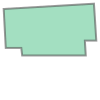

In [12]:
bld = wkt.loads(building['wkt'])
bld

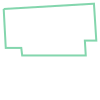

In [13]:
bld.boundary

In [14]:
bld.area

942.9761590092912

## Building by disaster analysis
Here we explore the dataset and count the number of building of each class for each disaster and for the total dataset.

In [15]:
not_building = []
labels = set()
buildings = []
for disaster_name, files_list in tqdm(json_files.items()):
    for file_path in tqdm(files_list):
        label_json = file_path.read_json()
        for building in label_json['features']['xy']:
            
            if building['properties']['feature_type'] != 'building':
                not_building.append(building)
            time_prefix = "pre" if file_path.find("pre") >= 0 else "post"
            dmg_label = building['properties'].get('subtype','no-damage')
            labels.add(dmg_label)
            tile_id = FilePath(file_path).basename().split("_")[1]
            buildings.append([disaster_name, tile_id, time_prefix, dmg_label, building['wkt']])
building_df = pd.DataFrame(buildings, columns=["dis_id", "tile_id", "time_prefix", "label", "wkt"])

100%|██████████| 19/19 [00:34<00:00,  1.84s/it]


In [16]:
print(f"Number of Not buildings {len(not_building)}")

Number of Not buildings 0


In [17]:
building_df

dis_id   tile_id time_prefix         label  \
0       guatemala-volcano  00000004        post  major-damage   
1       guatemala-volcano  00000004        post  major-damage   
2       guatemala-volcano  00000004        post  major-damage   
3       guatemala-volcano  00000004        post  major-damage   
4       guatemala-volcano  00000004        post  major-damage   
...                   ...       ...         ...           ...   
850731       woolsey-fire  00000871         pre     no-damage   
850732       woolsey-fire  00000871         pre     no-damage   
850733       woolsey-fire  00000871         pre     no-damage   
850734       woolsey-fire  00000871         pre     no-damage   
850735       woolsey-fire  00000871         pre     no-damage   

                                                      wkt  
0       POLYGON ((212.2425241572 0.005244624768526229,...  
1       POLYGON ((111.0102139006811 45.00256966117878,...  
2       POLYGON ((70.80872744088899 136.8631511105073,...  
3       POLYGON ((101.7572618843397 143.6071892445766,...  
4       POLYGON ((151.2496055086376 218.2691614266855,...  
...                                                   ...  
850731  POLYGON ((456.3517456901946 602.4305091848393,...  
850732  POLYGON ((541.5926455670866 583.4702351452573,...  
850733  POLYGON ((524.8688907831191 643.1025081251053,...  
850734  POLYGON ((541.9189263733463 650.3631925910292,...  
850735  POLYGON ((871.7535663624826 980.6419744714217,...  

[850736 rows x 5 columns]

In [18]:
building_df.value_counts(["time_prefix"])

time_prefix
post           425368
pre            425368
Name: count, dtype: int64

In [19]:
dmg_by_dis_df = building_df[building_df["time_prefix"] == "post"].value_counts(["dis_id","label"]).unstack()
dmg_by_dis_df[dmg_by_dis_df.isna()] = 0.0
dmg_by_dis_df = dmg_by_dis_df.astype(int) 
dmg_by_dis_df

label                destroyed  major-damage  minor-damage  no-damage  \
dis_id                                                                  
guatemala-volcano           33            23            26        731   
hurricane-florence          81          1949           232       8466   
hurricane-harvey           848         13378          4510      18638   
hurricane-matthew         3524          2717         12331       4058   
hurricane-michael         1225          2919          8292      22692   
joplin-tornado            3274          1005          2192       8225   
lower-puna-volcano         504            26            49       2277   
mexico-earthquake            3            54           221      51084   
midwest-flooding           165           193           246      12819   
moore-tornado             1584           449           886      19453   
nepal-flooding             502          4721          5134      31225   
palu-tsunami              7203          1178             1      46796   
pinery-bushfire            229            99            82       5027   
portugal-wildfire         1090           296           176      20787   
santa-rosa-wildfire       5810            95           121      15843   
socal-fire                2333           110           136      15697   
sunda-tsunami              179           100             0      14078   
tuscaloosa-tornado        1097           466          2036      10499   
woolsey-fire              1876           126           189       4638   

label                un-classified  
dis_id                              
guatemala-volcano              178  
hurricane-florence             820  
hurricane-harvey               581  
hurricane-matthew             1334  
hurricane-michael              373  
joplin-tornado                 656  
lower-puna-volcano             554  
mexico-earthquake              111  
midwest-flooding               473  
moore-tornado                  586  
nepal-flooding                1683  
palu-tsunami                   611  
pinery-bushfire                524  
portugal-wildfire             1064  
santa-rosa-wildfire             86  
socal-fire                     693  
sunda-tsunami                 2590  
tuscaloosa-tornado             908  
woolsey-fire                   186

In [20]:
dmg_by_dis_df.describe()

label    destroyed  major-damage  minor-damage     no-damage  un-classified
count    19.000000     19.000000     19.000000     19.000000      19.000000
mean   1661.052632   1573.894737   1940.000000  16475.421053     737.421053
std    2014.697178   3134.897498   3383.033271  13881.133512     606.094448
min       3.000000     23.000000      0.000000    731.000000      86.000000
25%     204.000000     99.500000    101.500000   6626.000000     423.000000
50%    1090.000000    296.000000    221.000000  14078.000000     586.000000
75%    2104.500000   1563.500000   2114.000000  20120.000000     864.000000
max    7203.000000  13378.000000  12331.000000  51084.000000    2590.000000

In [21]:
row_sum = dmg_by_dis_df.sum(axis=1)
col_sum = dmg_by_dis_df.sum(axis=0)
col_sum.loc["Total"] = row_sum.sum()
dmg_table = dmg_by_dis_df.copy()
dmg_table["Total"] = row_sum
dmg_table.loc["Total"] = col_sum
dmg_table

label                destroyed  major-damage  minor-damage  no-damage  \
dis_id                                                                  
guatemala-volcano           33            23            26        731   
hurricane-florence          81          1949           232       8466   
hurricane-harvey           848         13378          4510      18638   
hurricane-matthew         3524          2717         12331       4058   
hurricane-michael         1225          2919          8292      22692   
joplin-tornado            3274          1005          2192       8225   
lower-puna-volcano         504            26            49       2277   
mexico-earthquake            3            54           221      51084   
midwest-flooding           165           193           246      12819   
moore-tornado             1584           449           886      19453   
nepal-flooding             502          4721          5134      31225   
palu-tsunami              7203          1178             1      46796   
pinery-bushfire            229            99            82       5027   
portugal-wildfire         1090           296           176      20787   
santa-rosa-wildfire       5810            95           121      15843   
socal-fire                2333           110           136      15697   
sunda-tsunami              179           100             0      14078   
tuscaloosa-tornado        1097           466          2036      10499   
woolsey-fire              1876           126           189       4638   
Total                    31560         29904         36860     313033   

label                un-classified   Total  
dis_id                                      
guatemala-volcano              178     991  
hurricane-florence             820   11548  
hurricane-harvey               581   37955  
hurricane-matthew             1334   23964  
hurricane-michael              373   35501  
joplin-tornado                 656   15352  
lower-puna-volcano             554    3410  
mexico-earthquake              111   51473  
midwest-flooding               473   13896  
moore-tornado                  586   22958  
nepal-flooding                1683   43265  
palu-tsunami                   611   55789  
pinery-bushfire                524    5961  
portugal-wildfire             1064   23413  
santa-rosa-wildfire             86   21955  
socal-fire                     693   18969  
sunda-tsunami                 2590   16947  
tuscaloosa-tornado             908   15006  
woolsey-fire                   186    7015  
Total                        14011  425368

Here we can see the number of disasters, number of tiles, and number of buildings polygons from xBD dataset.

In [22]:
from matplotlib import rcParams

# Configuración global de los tamaños de fuente
rcParams['font.size'] = 12  # Tamaño de la fuente por defecto
rcParams['axes.titlesize'] = 15  # Tamaño de la fuente del título del eje
rcParams['axes.labelsize'] = 14  # Tamaño de la fuente de las etiquetas del eje
rcParams['xtick.labelsize'] = 12  # Tamaño de la fuente de las etiquetas del eje x
rcParams['ytick.labelsize'] = 12  # Tamaño de la fuente de las etiquetas del eje y


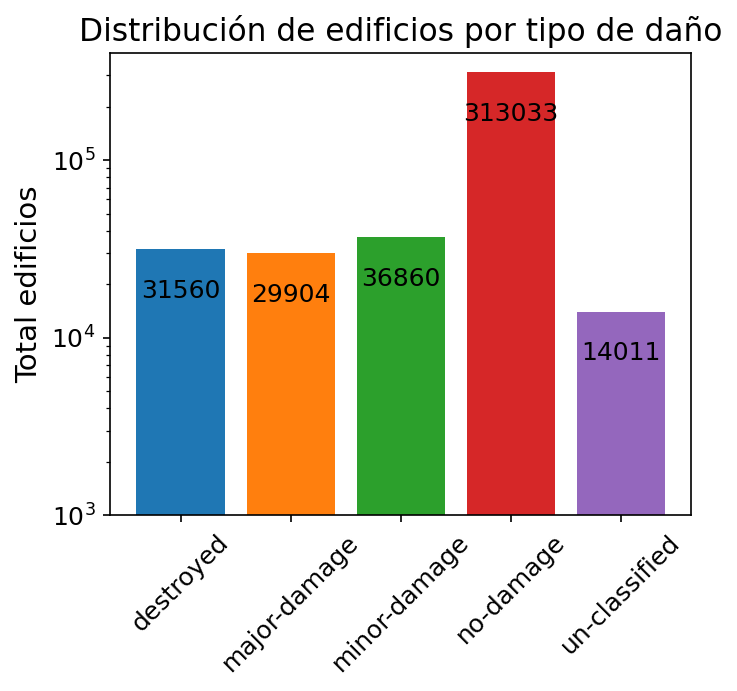

In [23]:
width = 0.8  # the width of the bars
fig, ax = plt.subplots(1, 1, figsize=(5, 4), dpi=150)

labels = ['destroyed', 'major-damage', 'minor-damage', 'no-damage', 'un-classified']
y_values = [dmg_table.loc["Total", label] for label in labels]

for label, y in zip(labels, y_values):
    bar = ax.bar(label, y, width);
    ax.text(label, y / 2, f'{y:.0f}', ha='center', va='bottom');

ax.set_yscale('log')
ax.set_ylim(10**3, 10**5.6)
#ax.set_ylabel('Total buildings')
#_ = ax.set_title('xBD dataset building class distribution')
ax.set_ylabel('Total edificios')
_ = ax.set_title('Distribución de edificios por tipo de daño')
_ = ax.set_xticks(list(range(len(labels))))
_ = ax.set_xticklabels(labels, rotation=45)

## weights for training

$ \text{Peso de la clase} = \frac{N_{total}}{N_{clase}​C}$​​

Where:
- $N_{total}$ is the total number of samples from dataset.
- $N_{clase}$ is the total number of samples from class.
- $​C$ is the total number of classes.
Not using these because we need those from the training split only.

In [24]:
for lab in labels:
    den = len(labels) * dmg_table.loc["Total",lab].sum()
    print(f"{lab}_w = {len(dmg_table) / den * 1000000}")

destroyed_w = 126.74271229404309
major-damage_w = 133.7613697164259
minor-damage_w = 108.51871947911016
no-damage_w = 12.778205492711631
un-classified_w = 285.4899721647277


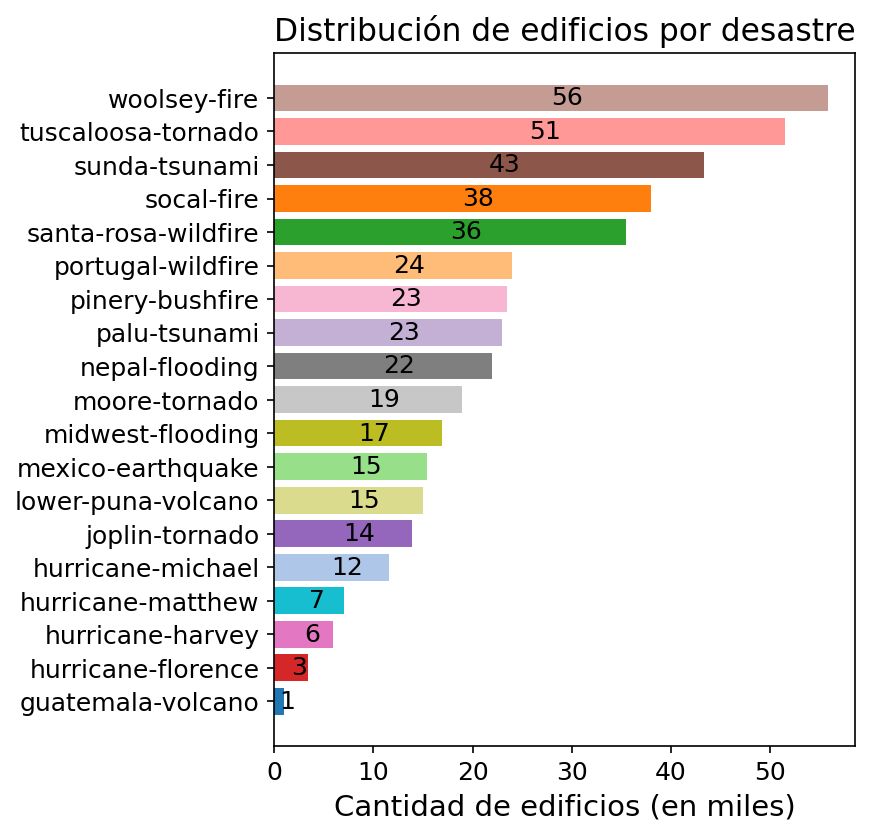

In [25]:
import matplotlib.pyplot as plt

width = 0.8  # the width of the bars
fig, ax = plt.subplots(1, 1, figsize=(5, 6), dpi=150)
colors = plt.colormaps['tab20']

labels = list(dmg_by_dis_df.index)
color_map = {label: colors(i) for i, label in enumerate(labels)}
values = [(label, dmg_table.loc[label, "Total"] / 1000 )  for label in labels]

values.sort(key=lambda x: x[1])

for label, y in values:
    bar = ax.barh(label, y , width, color=color_map[label], label=label)
    ax.text(y / 2, label, f'{y:.0f}', ha='left', va='center')

#ax.set_xlim(0, 65)
ax.set_xlabel('Cantidad de edificios (en miles)')
ax.set_title('Distribución de edificios por desastre')
#ax.set_xlabel('Total buildings (in thousands)')Here, we count and analyze the frequency of buildings of a particular class appearing within the same tile.
#ax.set_title('xBD dataset building distribution by disaster')
_ = ax.set_yticks(list(range(len(labels))))
_ = ax.set_yticklabels(labels)


## Correlation analysis of labels per disaster

In [26]:
correlation_matrix = dmg_by_dis_df.corr()
correlation_matrix

label          destroyed  major-damage  minor-damage  no-damage  un-classified
label                                                                         
destroyed       1.000000     -0.072105      0.091938   0.253817      -0.166782
major-damage   -0.072105      1.000000      0.463288   0.117501       0.084571
minor-damage    0.091938      0.463288      1.000000  -0.050269       0.221128
no-damage       0.253817      0.117501     -0.050269   1.000000      -0.028227
un-classified  -0.166782      0.084571      0.221128  -0.028227       1.000000

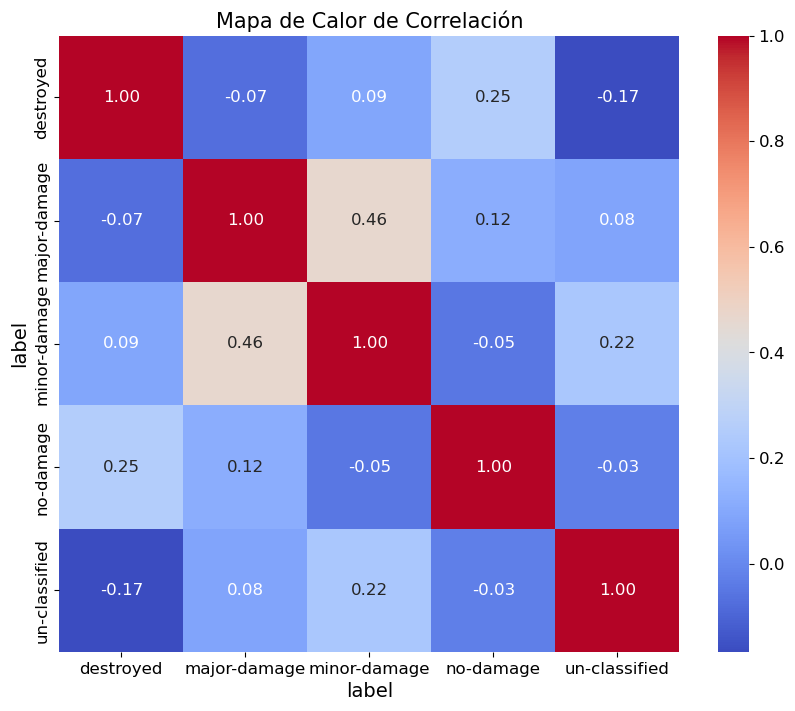

In [27]:
# Crea el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación')
plt.show()

## Analysis of building distribution in tiles
Here, we count and analyze the frequency of buildings of a particular class appearing within the same tile.


In [28]:
labels = ["destroyed", "major-damage", "minor-damage", "no-damage", "un-classified"]
tiles = []
for disaster_name, files_list in tqdm(json_files.items()):
    for file_path in files_list:
        curr_path = FilePath(file_path)
        if(curr_path.basename().find("post") > -1):
            label_json = file_path.read_json()
            tile_id = curr_path.basename().split("_")[1]

            label_count = np.zeros(5,dtype=np.uint16)
            for building in label_json['features']['xy']:
                dmg_label = building['properties'].get('subtype')
                i = labels.index(dmg_label)
                label_count[i] += 1
            row = [disaster_name, tile_id]
            row.extend(label_count.tolist())
            tiles.append(row)
dmg_by_tile_df = pd.DataFrame(tiles, columns=["dis_id", "tile_id", "destroyed", "major-damage", "minor-damage", "no-damage", "un-classified"])
dmg_by_tile_df = dmg_by_tile_df.set_index(["dis_id","tile_id"])
dmg_by_tile_df

100%|██████████| 19/19 [00:13<00:00,  1.39it/s]


destroyed  major-damage  minor-damage  no-damage  \
dis_id            tile_id                                                      
guatemala-volcano 00000004          4             8             6          2   
                  00000012          0             0             0         33   
                  00000014          1             5             0          0   
                  00000020          0             0             8         27   
                  00000022          2             1             0          4   
...                               ...           ...           ...        ...   
woolsey-fire      00000873          0             0             0          0   
                  00000874          0             0             0          0   
                  00000875          0             0             0          0   
                  00000876          0             0             0          0   
                  00000877          0             0             0          0   

                            un-classified  
dis_id            tile_id                  
guatemala-volcano 00000004              0  
                  00000012              0  
                  00000014              1  
                  00000020              1  
                  00000022              0  
...                                   ...  
woolsey-fire      00000873              0  
                  00000874              0  
                  00000875              0  
                  00000876              0  
                  00000877              0  

[11034 rows x 5 columns]

In [29]:
from matplotlib import rcParams

rcParams['font.size'] = 12  # Tamaño de la fuente por defecto
rcParams['axes.titlesize'] = 15  # Tamaño de la fuente del título del eje
rcParams['axes.labelsize'] = 14  # Tamaño de la fuente de las etiquetas del eje
#rcParams['xtick.labelsize'] = 12  # Tamaño de la fuente de las etiquetas del eje x
#rcParams['ytick.labelsize'] = 12  # Tamaño de la fuente de las etiquetas del eje y

          destroyed  major-damage  minor-damage     no-damage  un-classified
count  11034.000000  11034.000000  11034.000000  11034.000000   11034.000000
mean       2.860250      2.710169      3.340584     28.369857       1.269802
std       20.117394     14.335390     18.812575     80.094072       6.631212
min        0.000000      0.000000      0.000000      0.000000       0.000000
25%        0.000000      0.000000      0.000000      0.000000       0.000000
50%        0.000000      0.000000      0.000000      1.000000       0.000000
75%        0.000000      0.000000      0.000000     20.000000       1.000000
max     1540.000000    441.000000    618.000000   1766.000000     260.000000


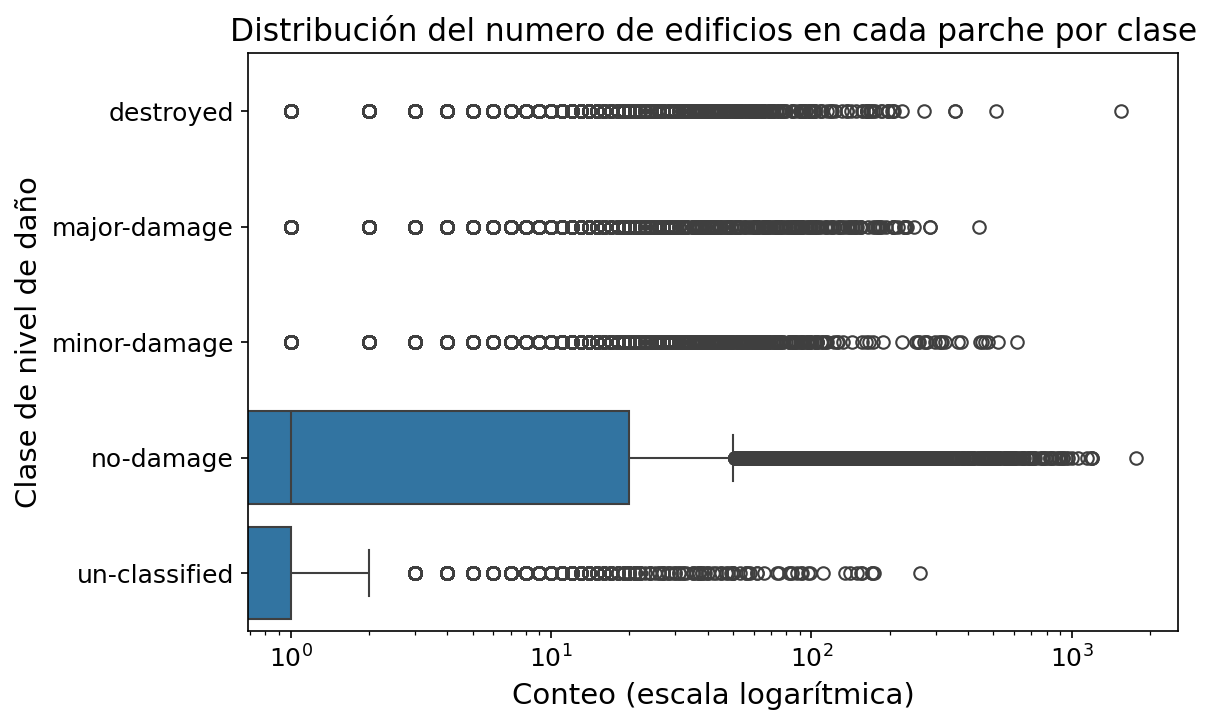

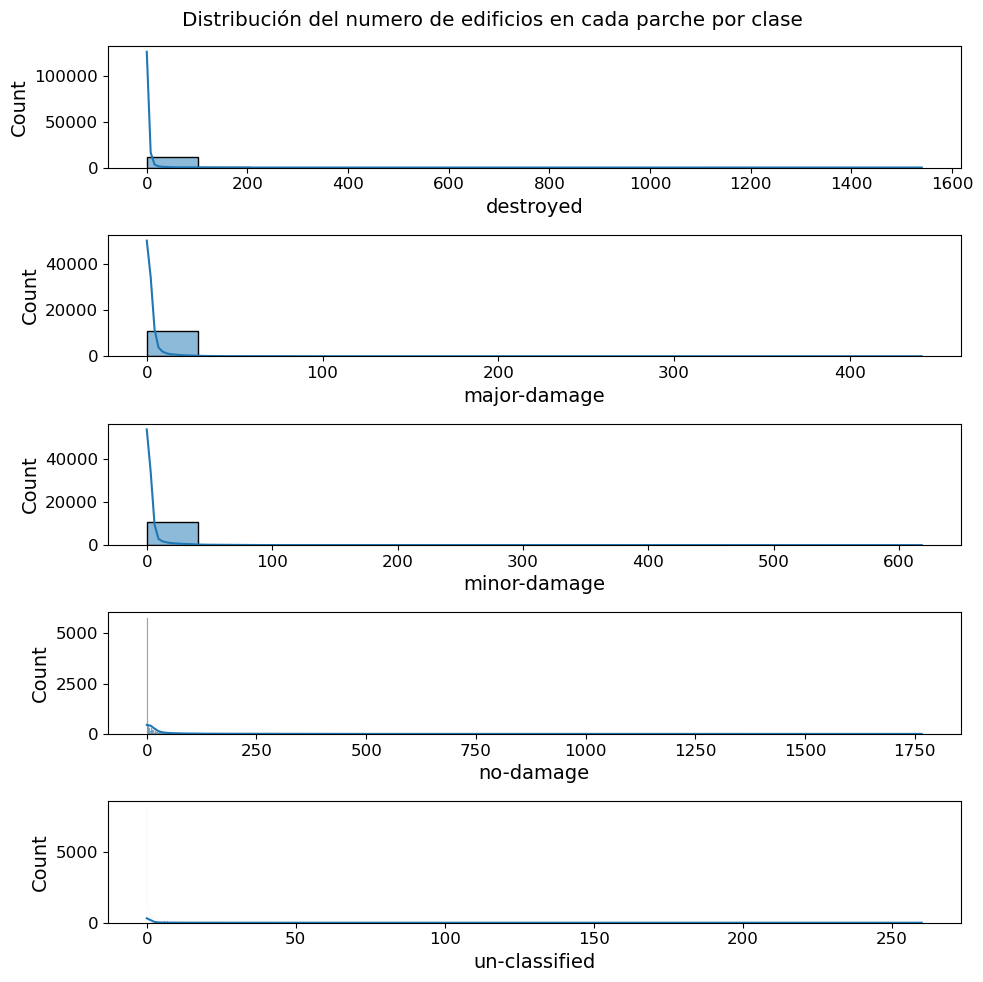

In [30]:
df = dmg_by_tile_df

print(df.describe())

df_long = df.melt(var_name='class', value_name='count')

plt.figure(figsize=(8, 5),dpi=150)
ax = sns.boxplot(x='count', y='class', data=df_long, orient='h')
ax.set_xscale("log")
plt.title('Distribución del numero de edificios en cada parche por clase')
plt.xlabel('Conteo (escala logarítmica)')
plt.ylabel('Clase de nivel de daño')
#plt.title('Distribution of the number of buildings on each tile by class')
#plt.xlabel('Number of buildings (logarithmic scale)')
#plt.ylabel('Damage level class')
plt.show()

num_columns = len(df.columns)
fig, axes = plt.subplots(num_columns, 1, figsize=(10, 10), dpi=100)
fig.suptitle("Distribución del numero de edificios en cada parche por clase")
for i, column in enumerate(df.columns):
    #sns.kdeplot(df[column], ax=axes[i], fill=True)
    sns.histplot(df[column], ax=axes[i], kde=True)
   
plt.tight_layout()
plt.show()

        destroyed  major-damage  minor-damage    no-damage  un-classified
count  193.000000    193.000000    193.000000   193.000000     193.000000
mean     0.015544      0.279793      1.145078   264.683938       0.575130
std      0.124025      1.367196      2.908266   215.497314       2.239746
min      0.000000      0.000000      0.000000     0.000000       0.000000
25%      0.000000      0.000000      0.000000   112.000000       0.000000
50%      0.000000      0.000000      0.000000   236.000000       0.000000
75%      0.000000      0.000000      0.000000   344.000000       0.000000
max      1.000000     16.000000     18.000000  1148.000000      17.000000


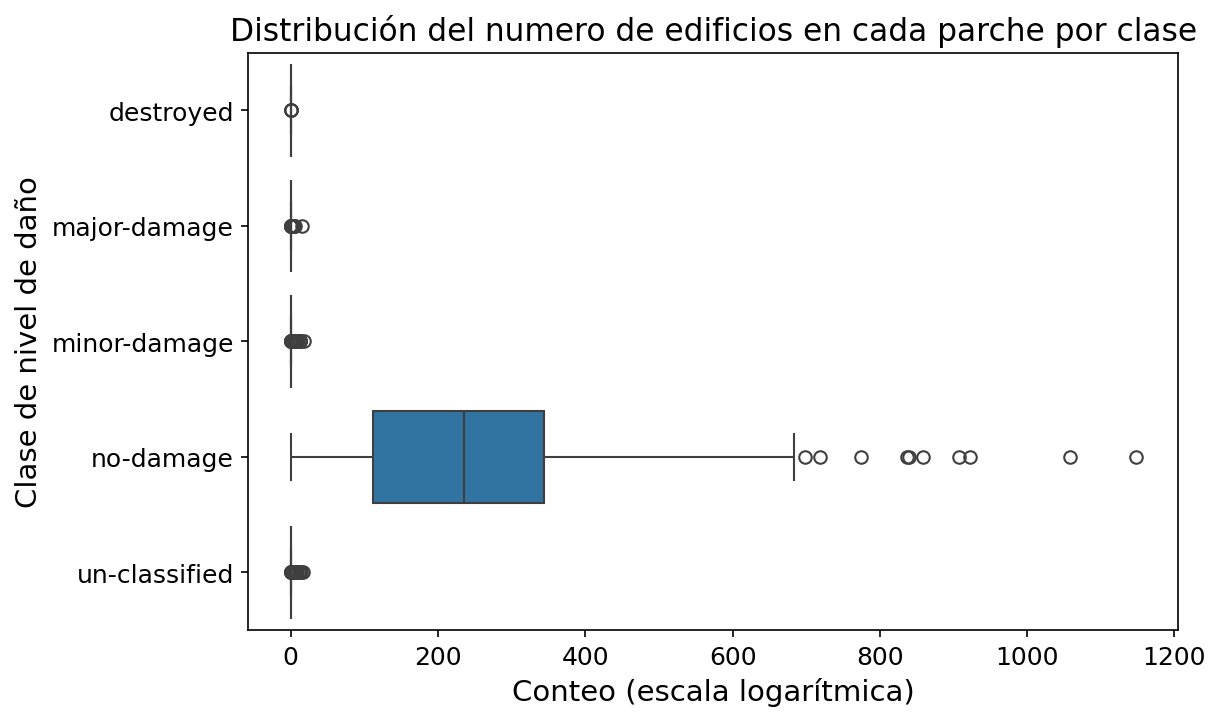

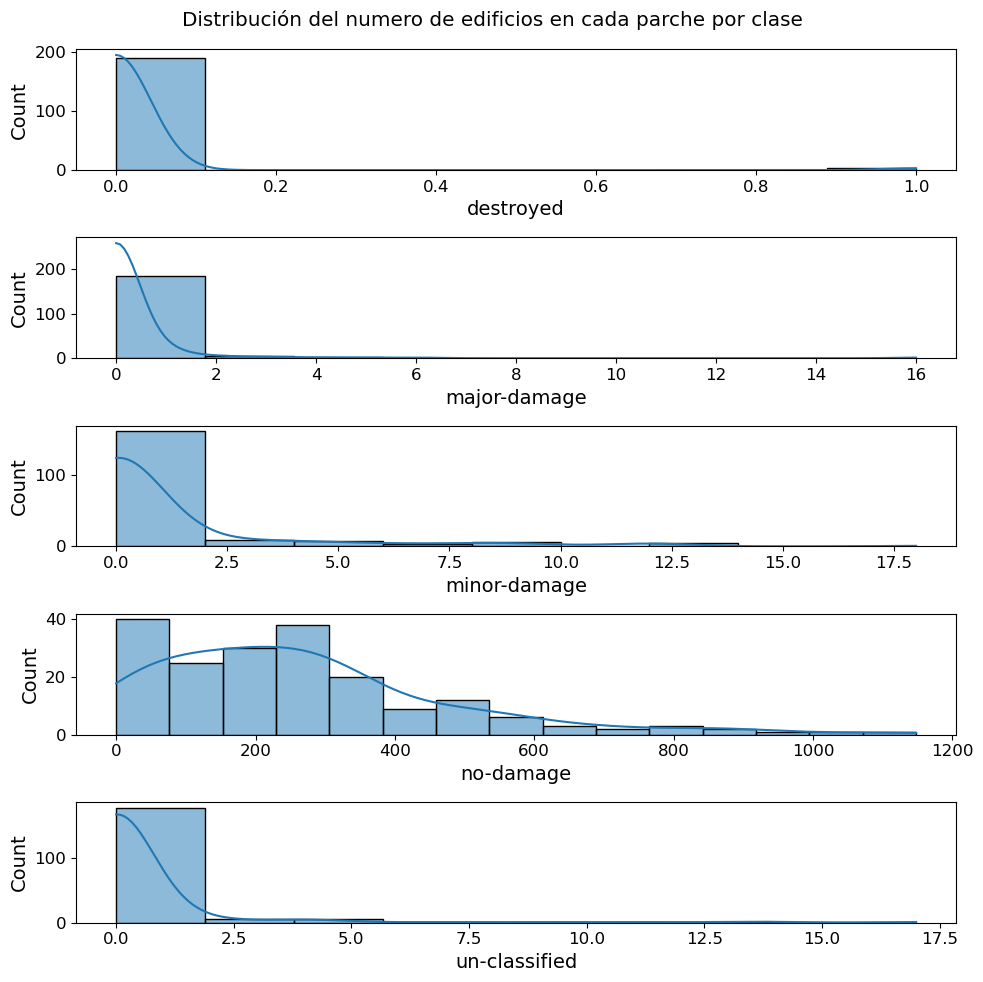

In [31]:
df = dmg_by_tile_df.loc[["mexico-earthquake"]]

print(df.describe())

df_long = df.melt(var_name='class', value_name='count')

plt.figure(figsize=(8, 5),dpi=150)
ax = sns.boxplot(x='count', y='class', data=df_long, orient='h')
#ax.set_xscale("log")
plt.title('Distribución del numero de edificios en cada parche por clase')
plt.xlabel('Conteo (escala logarítmica)')
plt.ylabel('Clase de nivel de daño')
#plt.title('Distribution of the number of buildings on each tile by class')
#plt.xlabel('Number of buildings (logarithmic scale)')
#plt.ylabel('Damage level class')
plt.show()

num_columns = len(df.columns)
fig, axes = plt.subplots(num_columns, 1, figsize=(10, 10), dpi=100)
fig.suptitle("Distribución del numero de edificios en cada parche por clase")
for i, column in enumerate(df.columns):
    #sns.kdeplot(df[column], ax=axes[i], fill=True)
    sns.histplot(df[column], ax=axes[i], kde=True)
   
plt.tight_layout()
plt.show()

## Correlation analysis of labels per tile

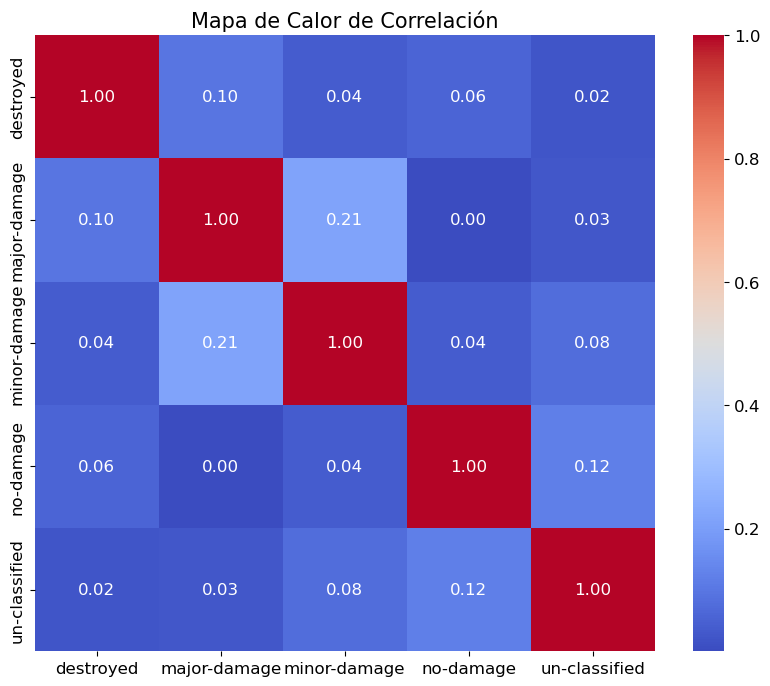

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(dmg_by_tile_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación')
plt.show()

## pixel color distribution

In [33]:
image_files = defaultdict(lambda : [])
for split_name in path.get_folder_names():
    split_folder = path.join(split_name)
    for file_folder in split_folder.get_folder_names():
        if(file_folder == "images"):
            folder_path = split_folder.join(file_folder)
            for img_name in folder_path.get_files_names():
                prefix = img_name.split("_")[0]
                img_path = folder_path.join(img_name)
                image_files[prefix].append(img_path)

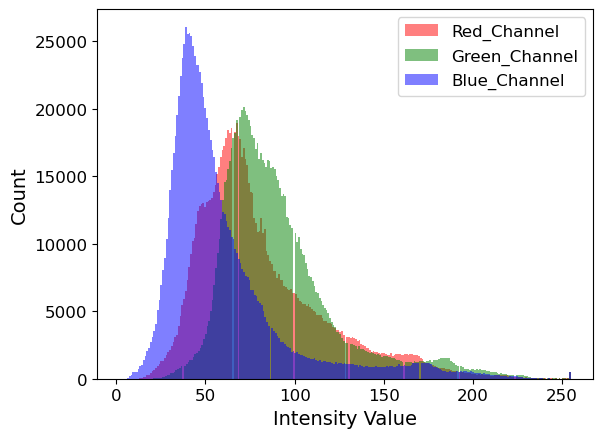

In [34]:
# plot histogram of the channels for entire dataset
import matplotlib.pyplot as plt
img = imread(image_files['guatemala-volcano'][0])
_ = plt.hist(img[:, :, 2].ravel(), bins = 256, color = 'red', alpha = 0.5)
_ = plt.hist(img[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
_ = plt.hist(img[:, :, 0].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.legend(['Red_Channel', 'Green_Channel', 'Blue_Channel'])
plt.show()

# Dataset images visualization

In [35]:
#Select an interesing example img
dmg_by_tile_df[(dmg_by_tile_df > 5).all(axis=1)]

destroyed  major-damage  minor-damage  no-damage  \
dis_id             tile_id                                                      
hurricane-matthew  00000123         32            17            15          6   
                   00000348         12            12             6         52   
                   00000297          7            12            10        152   
                   00000243         11             9             9          6   
                   00000293         11             7            21         12   
                   00000302          7            51            63         95   
                   00000130          7             9            11         47   
                   00000185          7            10            10         13   
hurricane-michael  00000237         19            19            53         44   
                   00000317         15            63            46         55   
                   00000121         13            18            36         74   
                   00000222          7            10            46         67   
                   00000313         16            22            47         40   
                   00000180          6            27            66         98   
joplin-tornado     00000000        102            27            43          6   
                   00000001         69            27            73         21   
                   00000025         56            17            33          7   
                   00000027         23            20            76         85   
                   00000043         62            25            30         15   
                   00000046          6             7            60        162   
                   00000075         45             7            15          7   
                   00000083         43            21            53         44   
                   00000110          9            12            42        135   
                   00000112          8            27            60        123   
                   00000113          8             7            15         22   
                   00000116         23            19            87        155   
                   00000118         52            51           105        123   
                   00000120        142            74            82         34   
                   00000121         37            10            18         10   
moore-tornado      00000003         18            10            15        151   
                   00000006         11             6            21        156   
                   00000017         25            12            30         58   
                   00000035         71            15            25         70   
                   00000050         37            10            40         54   
                   00000051        197            24            28         13   
                   00000104         26            10            48        165   
                   00000115        163            20             8          8   
                   00000132         17             6            10         99   
nepal-flooding     00000028         12            19            63        230   
                   00000225          7            65            62        208   
                   00000231          8            68            66          7   
tuscaloosa-tornado 00000024         27            13            41        101   
                   00000037         46            14            25         23   
                   00000071         44             8            23         24   
                   00000095         14            15            56         29   
                   00000099         52            23            33          6   
                   00000243         27             6            14         26   
                   00000269         14            10        

In [36]:
# Example img paths
pre_img_path = FilePath("/media/mrtc101/Martín SSD/tesis/datasets/xBD/tier3/images/joplin-tornado_00000120_pre_disaster.png")
post_img_path = FilePath("/media/mrtc101/Martín SSD/tesis/datasets/xBD/tier3/images/joplin-tornado_00000120_post_disaster.png")
pre_lab_path = FilePath("/media/mrtc101/Martín SSD/tesis/datasets/xBD/tier3/labels/joplin-tornado_00000120_pre_disaster.json")
post_lab_path = FilePath("/media/mrtc101/Martín SSD/tesis/datasets/xBD/tier3/labels/joplin-tornado_00000120_post_disaster.json")

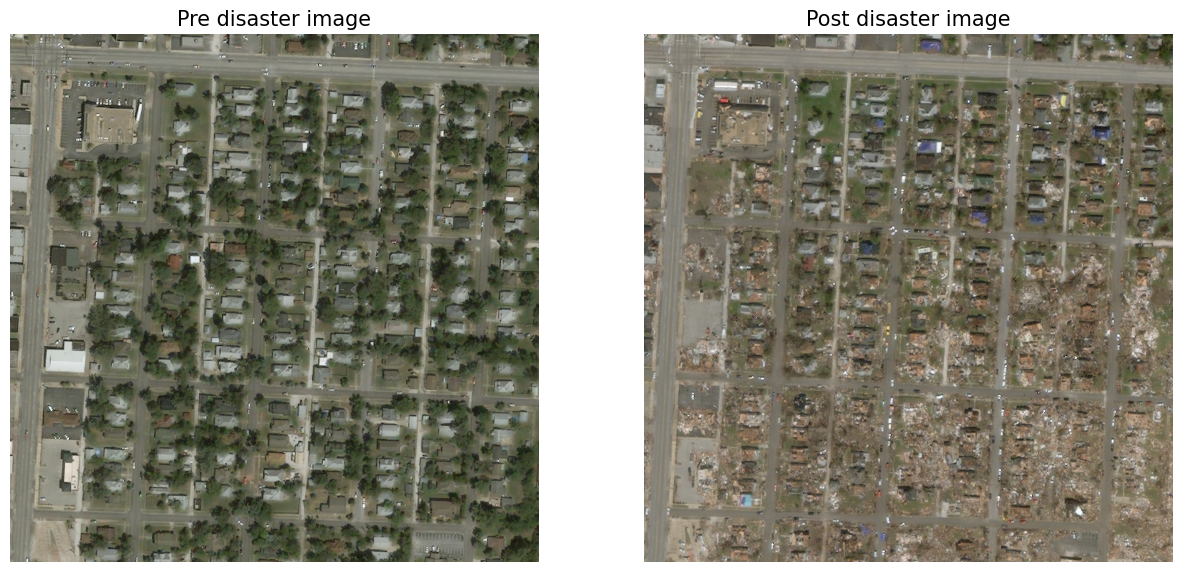

In [37]:
#Load imgs
import cv2
from matplotlib.axes import Axes
from typing import List

pre_img = cv2.imread(pre_img_path)
pre_img = cv2.cvtColor(pre_img, cv2.COLOR_BGR2RGB)
post_img = cv2.imread(post_img_path)
post_img = cv2.cvtColor(post_img, cv2.COLOR_BGR2RGB)

axs : List[Axes]
fig, axs = plt.subplots(1,2,figsize=(15,10))
_ = axs[0].imshow(pre_img)
_ = axs[0].set_axis_off()
_ = axs[0].set_title("Pre disaster image")
_ = axs[1].imshow(post_img)
_ = axs[1].set_axis_off()
_ = axs[1].set_title("Post disaster image")

In [38]:
def create_instance_mask(json_file_path : str) -> np.ndarray:
    lab_dict = json_file_path.read_json()
    size = (1024, 1024)
    shapes_list = []
    
    for i, building in enumerate(lab_dict['features']['xy'], start=1):
        poly = wkt.loads(building['wkt'])
        shapes_list.append((poly, i))
        
    mask_img = np.zeros(shape=size, dtype=np.uint16)
    if len(shapes_list) > 0:
        mask_img = rasterize(shapes_list, size, fill=0, dtype=np.uint16)
    return mask_img

gray_bld_mask = create_binary_mask(pre_lab_path)
gray_dmg_mask = create_binary_mask(post_lab_path)


NameError: name 'create_binary_mask' is not defined

In [ ]:
required_colors = [mcolors.to_rgb(mcolors.CSS4_COLORS[color]) for color in label_map.color_list]
colormap = mcolors.ListedColormap(required_colors)
def turn_to_rgb(gray_mask : np.ndarray) -> np.ndarray:
    # Crear una imagen en blanco con el tamaño adecuado
    img = np.zeros((gray_mask.shape[1], gray_mask.shape[0], 3), dtype=np.uint8)
    # Aplicar colores a cada etiqueta única
    for label_i in np.unique(gray_mask):
        img[np.where(gray_mask == label_i)] = np.array(colormap(label_i)[:3]) * 255
    return img
bld_mask = turn_to_rgb(gray_bld_mask)
dmg_mask = turn_to_rgb(gray_dmg_mask)

axs : List[Axes]
fig, axs = plt.subplots(1,2,figsize=(15,10))
_ = axs[0].imshow(bld_mask)
_ = axs[0].set_axis_off()
_ = axs[0].set_title("Pre disaster building mask")
_ = axs[1].imshow(dmg_mask)
_ = axs[1].set_axis_off()
_ = axs[1].set_title("Post disaster damage mask")

In [ ]:
from typing import List
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns

# Aplicar un estilo para mejorar la apariencia
sns.set_theme(style="whitegrid")

# Crear los subplots
fig, axs = plt.subplots(1, def turn_to_rgb(gray_mask : np.ndarray) -> np.ndarray:
    # Crear una imagen en blanco con el tamaño adecuado
    img = np.zeros((gray_mask.shape[1], gray_mask.shape[0], 3), dtype=np.uint8)
    # Aplicar colores a cada etiqueta única
    for label_i in np.unique(gray_mask):
        img[np.where(gray_mask == label_i)] = np.array(colormap(label_i)[:3]) * 255
    return img4, figsize=(15, 4), dpi=300)

# Título general del conjunto de imágenes
fig.suptitle("Imagen 00000120 del subconjunto tier3 del desastre joplin-tornado de xBD",
             fontsize=18, fontweight='bold', y=1.05)

# Mostrar la imagen pre-desastre
axs[0].imshow(pre_img)
axs[0].set_axis_off()
axs[0].set_title("Imagen pre-desastre")

# Mostrar la máscara de edificios pre-desastre
axs[1].imshow(bld_mask)
axs[1].set_axis_off()
axs[1].set_title("Máscara de edificios")

# Mostrar la imagen post-desastre
axs[2].imshow(post_img)
axs[2].set_axis_off()
axs[2].set_title("Imagen post-desastre")

# Mostrar la máscara de daños post-desastre
axs[3].imshow(dmg_mask)
axs[3].set_axis_off()
axs[3].set_title("Máscara de daños")

plt.tight_layout()
plt.subplots_adjust(top=0.9, wspace=0)  # Ajuste para el título general
plt.show()

In [ ]:
# Mostrar las máscaras superpuestas
import cv2
import matplotlib.pyplot as plt


sns.set_theme(style="whitegrid")

# Crear los subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4), dpi=300)

# Título general del conjunto de imágenes
fig.suptitle("Imagen 00000120 del subconjunto tier3 del desastre joplin-tornado de xBD",
             fontsize=10, fontweight='bold', y=1.05)

alpha= 0.45
target_pre_img = cv2.addWeighted(pre_img, 0.8, bld_mask, alpha, 0)
target_post_img = cv2.addWeighted(post_img, 0.8, dmg_mask, alpha, 0)

# Mostrar la imagen pre-desastre
axs[0].imshow(target_pre_img)
axs[0].set_axis_off()
axs[0].set_title("Imagen pre-desastre")

# Mostrar la máscara de edificios pre-desastre
axs[1].imshow(target_post_img)
axs[1].set_axis_off()
axs[1].set_title("Imagen post-desastre")

plt.subplots_adjust(top=1, wspace=0.01)
plt.show()

In [ ]:
def create_instance_mask(json_file_path : str) -> np.ndarray:
    lab_dict = json_file_path.read_json()
    size = (1024, 1024)
    shapes_list = []
    
    for i, building in enumerate(lab_dict['features']['xy'], start=1):
        poly = wkt.loads(building['wkt'])
        shapes_list.append((poly, i))
        
    mask_img = np.zeros(shape=size, dtype=np.uint16)
    if len(shapes_list) > 0:
        mask_img = rasterize(shapes_list, size, fill=0, dtype=np.uint16)
    return mask_img

instance_mask = create_instance_mask(pre_lab_path)

colormap = plt.get_cmap('inferno') 

def gray_to_rgb(gray_image, colormap):
    # Normalizar la imagen en escala de grises a valores entre 0 y 1
    normalized_image = (gray_image - gray_image.min()) / (gray_image.max() - gray_image.min())

    # Aplicar el colormap
    rgba_image = colormap(normalized_image)  # Convierte a RGBA
    rgb_image = (rgba_image[:, :, :3] * 255).astype(np.uint8)  # Extraer RGB y convertir a uint8

    return rgb_image

rgb_image = gray_to_rgb(instance_mask, colormap)

# Crear los subplots
fig, ax = plt.subplots(1, 1, figsize=(3, 3), dpi=300)

# Título general del conjunto de imágenes
#fig.suptitle("Instance mask", fontsize=10, fontweight='bold', y=1.05)

alpha= 1
target_pre_img = cv2.addWeighted(pre_img, 0.8, rgb_image, alpha, 0)

ax.imshow(target_pre_img)
ax.set_axis_off()
ax.set_title("Máscara de Instancias de Imagen \n00000120 del subconjunto tier3\n del desastre joplin-tornado de xBD",fontsize=8)

plt.subplots_adjust(top=0.95, wspace=0.01)
plt.show()


In [ ]:
pre_img_path = FilePath("/media/mrtc101/Martín SSD/tesis/datasets/xBD/train/images/mexico-earthquake_00000030_pre_disaster.png")
post_img_path = FilePath("/media/mrtc101/Martín SSD/tesis/datasets/xBD/train/images/mexico-earthquake_00000030_post_disaster.png")
pre_lab_path = FilePath("/media/mrtc101/Martín SSD/tesis/datasets/xBD/train/labels/mexico-earthquake_00000030_pre_disaster.json")
post_lab_path = FilePath("/media/mrtc101/Martín SSD/tesis/datasets/xBD/train/labels/mexico-earthquake_00000030_post_disaster.json")

pre_img = cv2.imread(pre_img_path)
pre_img = cv2.cvtColor(pre_img, cv2.COLOR_BGR2RGB)
post_img = cv2.imread(post_img_path)
post_img = cv2.cvtColor(post_img, cv2.COLOR_BGR2RGB)

gray_bld_mask = create_binary_mask(pre_lab_path)
gray_dmg_mask = create_binary_mask(post_lab_path)
bld_mask = turn_to_rgb(gray_bld_mask)
dmg_mask = turn_to_rgb(gray_dmg_mask)

sns.set_theme(style="whitegrid")

# Crear los subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4), dpi=300)

# Título general del conjunto de imágenes
fig.suptitle("Imagen 00000030 del subconjunto train del desastre mexico-earthquake de xBD",
             fontsize=10, fontweight='bold', y=1.05)

alpha= 0.9
target_pre_img = cv2.addWeighted(pre_img, 0.8, bld_mask, alpha, 0)
target_post_img = cv2.addWeighted(post_img, 0.8, dmg_mask, alpha, 0)

# Mostrar la imagen pre-desastre
axs[0].imshow(target_pre_img)
axs[0].set_axis_off()
axs[0].set_title("Imagen pre-desastre")

# Mostrar la máscara de edificios pre-desastre
axs[1].imshow(target_post_img)
axs[1].set_axis_off()
axs[1].set_title("Imagen post-desastre")

plt.subplots_adjust(top=1, wspace=0.01)
plt.show()

# My Cutmix implementation

In [ ]:
import cv2
import matplotlib.colors as mcolors
from utils.visualization.label_to_color import LabelDict

label_map = LabelDict()

pre_img_path = FilePath("/home/mrtc101/Desktop/tesina/figures/mexico-earthquake_10a00000059/mexico-earthquake_10a00000059_pre_disaster.png")
post_img_path = FilePath("/home/mrtc101/Desktop/tesina/figures/mexico-earthquake_10a00000059/mexico-earthquake_10a00000059_post_disaster.png")
pre_lab_path = FilePath("/home/mrtc101/Desktop/tesina/figures/mexico-earthquake_10a00000059/mexico-earthquake_10a00000059_pre_disaster_target.png")
post_lab_path = FilePath("/home/mrtc101/Desktop/tesina/figures/mexico-earthquake_10a00000059/mexico-earthquake_10a00000059_post_disaster_target.png")

pre_img = cv2.imread(pre_img_path)
pre_img = cv2.cvtColor(pre_img, cv2.COLOR_BGR2RGB)
post_img = cv2.imread(post_img_path)
post_img = cv2.cvtColor(post_img, cv2.COLOR_BGR2RGB)

required_colors = [mcolors.to_rgb(mcolors.CSS4_COLORS[color]) for color in label_map.color_list]
colormap = mcolors.ListedColormap(required_colors)

def turn_to_rgb(gray_mask : np.ndarray) -> np.ndarray:
    # Crear una imagen en blanco con el tamaño adecuado
    img = np.zeros((gray_mask.shape[1], gray_mask.shape[0], 3), dtype=np.uint8)
    # Aplicar colores a cada etiqueta única
    for label_i in np.unique(gray_mask):
        img[np.where(gray_mask == label_i)] = np.array(colormap(label_i)[:3]) * 255
    return img

# Read and convert the building and damage masks to grayscale
gray_bld_mask = cv2.imread(pre_lab_path, cv2.IMREAD_GRAYSCALE)
gray_dmg_mask = cv2.imread(post_lab_path, cv2.IMREAD_GRAYSCALE)

# Convert the grayscale masks to RGB using the turn_to_rgb function
bld_mask = turn_to_rgb(gray_bld_mask)
dmg_mask = turn_to_rgb(gray_dmg_mask)

sns.set_theme(style="whitegrid")

# Crear los subplotsgray_bld_mask
fig, axs = plt.subplots(1, 2, figsize=(8, 4), dpi=300)

# Título general del conjunto de imágenes
fig.suptitle("Imagen aumentada 10a00000059 de desastre mexico-earthquake",
             fontsize=10, fontweight='bold', y=1.05)

alpha= 0.9
target_pre_img = cv2.addWeighted(pre_img, 0.8, bld_mask, alpha, 0)
target_post_img = cv2.addWeighted(post_img, 0.8, dmg_mask, alpha, 0)

# Mostrar la imagen pre-desastre
axs[0].imshow(target_pre_img)
axs[0].set_axis_off()
axs[0].set_title("Imagen pre-desastre")

# Mostrar la máscara de edificios pre-desastre
axs[1].imshow(target_post_img)
axs[1].set_axis_off()
axs[1].set_title("Imagen post-desastre")

plt.subplots_adjust(top=1, wspace=0.01)
plt.show()

# Postprocessing Output

In [ ]:
import cv2
import matplotlib.colors as mcolors
from utils.visualization.label_to_color import LabelDict

label_map = LabelDict()

dmg_mask_path = FilePath("/home/mrtc101/Desktop/tesina/figures/mexico-earthquake_00000024/mexico-earthquake_00000024_pred_damage_mask.png")
dmg_mask = cv2.imread(dmg_mask_path)
dmg_mask = cv2.cvtColor(dmg_mask, cv2.COLOR_BGR2RGB)
bb1_path = FilePath("/home/mrtc101/Desktop/tesina/figures/mexico-earthquake_00000024/pd_bbs/mexico-earthquake_00000024_no-damage_bbs.png")
bb1 = cv2.imread(bb1_path)
bb1 = cv2.cvtColor(bb1, cv2.COLOR_BGR2RGB)
bb2_path = FilePath("/home/mrtc101/Desktop/tesina/figures/mexico-earthquake_00000024/pd_bbs/mexico-earthquake_00000024_minor-damage_bbs.png")
bb2 = cv2.imread(bb2_path)
bb2 = cv2.cvtColor(bb2, cv2.COLOR_BGR2RGB)
bb3_path = FilePath("/home/mrtc101/Desktop/tesina/figures/mexico-earthquake_00000024/pd_bbs/mexico-earthquake_00000024_major-damage_bbs.png")
bb3 = cv2.imread(bb3_path)
bb3 = cv2.cvtColor(bb3, cv2.COLOR_BGR2RGB)

sns.set_theme(style="whitegrid")
# Crear los subplotsgray_bld_mask
fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=300)

# Título general del conjunto de imágenes
alpha= 0.9
bb1_mask = cv2.addWeighted(dmg_mask, 0.8, bb1, alpha, 0)
bb2_mask = cv2.addWeighted(bb1_mask, 0.8, bb2, alpha, 0)
bb3_mask = cv2.addWeighted(bb2_mask, 0.8, bb3, alpha, 0)

# Mostrar la imagen pre-desastre
ax.set_axis_off()
ax.imshow(bb3_mask)


# Stratified data sampling

In [2]:
import sys
sys.path.append("../src")
from utils.common.pathManager import FilePath
from tqdm import tqdm
import pandas as pd
import numpy as np
from collections import defaultdict
path = FilePath("/media/mrtc101/Martín SSD/tesis/datasets/xBD")
print(path.get_folder_names())

['hold', 'test', 'tier3', 'train']


In [3]:
labels = "destroyed", "major-damage", "minor-damage", "no-damage", "un-classified"
tiles = []
for split_folder in path.get_folder_paths():
    folder_path = split_folder.join("labels")
    for json_name in folder_path.get_files_names():
        splited_name = json_name.split("_")
        time_prefix = splited_name[2]
        if time_prefix == "post":
            dis_id = splited_name[0]        
            tile_id = splited_name[1]
            json_path = folder_path.join(json_name)
            label_dict = json_path.read_json()
            label_count = pd.Series(np.zeros(5, dtype=np.uint16), index=labels)
            for building in label_dict['features']['xy']:
                dmg_label = building['properties'].get('subtype')
                label_count[dmg_label] += 1
            row = [dis_id, tile_id]
            row.extend(label_count.tolist())
            tiles.append(row)         
dmg_by_tile_df = pd.DataFrame(tiles, columns=["dis_id", "tile_id", "destroyed", "major-damage", "minor-damage", "no-damage", "un-classified"])
dmg_by_tile_df

dis_id   tile_id  destroyed  major-damage  minor-damage  \
0        guatemala-volcano  00000004          4             8             6   
1        guatemala-volcano  00000012          0             0             0   
2        guatemala-volcano  00000014          1             5             0   
3        guatemala-volcano  00000020          0             0             8   
4        guatemala-volcano  00000022          2             1             0   
...                    ...       ...        ...           ...           ...   
11029  santa-rosa-wildfire  00000152          8             0             1   
11030  santa-rosa-wildfire  00000153          0             0             0   
11031  santa-rosa-wildfire  00000155        203             0             1   
11032  santa-rosa-wildfire  00000156          0             0             0   
11033  santa-rosa-wildfire  00000158         10             0             0   

       no-damage  un-classified  
0              2              0  
1             33              0  
2              0              1  
3             27              1  
4              4              0  
...          ...            ...  
11029          0              1  
11030         53              0  
11031         84              0  
11032         65              0  
11033          2              0  

[11034 rows x 7 columns]

# Gready

$$ \text{min}(\text{Var}(S_1,S_2,S_3,S_4) =  \frac{1}{n}\sum_{i=1}^{4}{(S_i - \bar{S})^2})$$

In [4]:
df : pd.DataFrame= dmg_by_tile_df[list(labels)].iloc[:,:4]
ids = df.sum(axis=1) == 0 
empty_df = dmg_by_tile_df[ids]
df = df[~ids]
df

destroyed  major-damage  minor-damage  no-damage
0              4             8             6          2
1              0             0             0         33
2              1             5             0          0
3              0             0             8         27
4              2             1             0          4
...          ...           ...           ...        ...
11029          8             0             1          0
11030          0             0             0         53
11031        203             0             1         84
11032          0             0             0         65
11033         10             0             0          2

[6984 rows x 4 columns]

In [38]:
from tqdm import trange, tqdm
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np

f = []

# Fitness function
def mean_square_error(matrix_arr : np.ndarray) -> np.ndarray:
    """Function that calculates the variation of the given series"""
    matrix_arr : np.ndarray = matrix_arr.astype(float)
    matrix_arr -= matrix_arr.mean(axis=1)[:,np.newaxis]
    matrix_arr = matrix_arr**2
    return matrix_arr.sum(axis=1) / matrix_arr.shape[1]

def get_best_candidate(candidates_df : pd.DataFrame, total_arr : np.ndarray) -> pd.DataFrame:
    """The variation of the sum of buildings per class is computed"""
    cand_matrix : np.ndarray = candidates_df.to_numpy()
    cand_matrix += total_arr
    points = mean_square_error(cand_matrix) - mean_square_error(np.array([total_arr]))
    f.append(mean_square_error(np.array([total_arr])))
    return points.argmin()

def gready_sort(df :pd.DataFrame) -> pd.DataFrame:
    """Builds a size n deterministic sample of images in a way that the resulting sample is as balanced as posible."""
    sample = []
    #Labels from input df
    idx = df.sum(numeric_only=True).index
    total_per_label = np.zeros(len(idx), dtype=np.int64)
    for _ in trange(len(df)):
        best_id = get_best_candidate(df.copy(), total_per_label)
        best_candidate = df.iloc[best_id]
        total_per_label += best_candidate.to_numpy()
        df = df.drop(best_candidate.name)
        sample.append(best_candidate)
    return pd.DataFrame(sample,columns=idx)
#4170

def get_d(df: pd.DataFrame, n : int, bld_min : float, start_index : int = None):
    if n > len(df):
        raise ValueError("El tamaño de la muestra n no puede ser mayor que la longitud del DataFrame.")
    if start_index == None:
        i = 0
        sample = df.iloc[0 : n]
        curr_bld_min = sample.sum(axis=0)
        while not (curr_bld_min >= bld_min).all() and i + n < len(df):
            i += 1
            sample = df.iloc[i:n+i]
            curr_bld_min = sample.sum(axis=0)
    else:
        i = start_index
        sample = df.iloc[i:i+n]        
    print(f"Índice de inicio: {i}, Índice de fin: {i + n - 1}")

    return sample


sorted_candidates_df = gready_sort(df)
sample_size = 1000
bld_min_number = 13000
sample = get_d(sorted_candidates_df, sample_size, bld_min_number)
number = 10
all_posibles = dmg_by_tile_df.loc[empty_df.index]
balanced_empty = all_posibles.groupby(["dis_id"]).apply(lambda x: x.sample(number, replace=True), include_groups=False)
emp_idx = [i[1] for i in balanced_empty.index]
final_set = pd.concat([dmg_by_tile_df.loc[sample.index],dmg_by_tile_df.loc[emp_idx]])
final_set

  0%|          | 0/6984 [00:00<?, ?it/s]

100%|██████████| 6984/6984 [00:03<00:00, 2313.09it/s]


Índice de inicio: 2997, Índice de fin: 3996


dis_id   tile_id  destroyed  major-damage  minor-damage  \
6994        sunda-tsunami  00000128          0             0             0   
2809       nepal-flooding  00000276          2            52             0   
9200  santa-rosa-wildfire  00000373         15             0             1   
9427    hurricane-michael  00000039          0             0             8   
1941       joplin-tornado  00000075         45             7            15   
...                   ...       ...        ...           ...           ...   
7569         woolsey-fire  00000219          0             0             0   
7495         woolsey-fire  00000144          0             0             0   
7516         woolsey-fire  00000162          0             0             0   
7806         woolsey-fire  00000449          0             0             0   
7955         woolsey-fire  00000599          0             0             0   

      no-damage  un-classified  
6994          6              1  
2809          0              4  
9200          8              0  
9427         16              0  
1941          7             12  
...         ...            ...  
7569          0              0  
7495          0              0  
7516          0              0  
7806          0              0  
7955          0              0  

[1190 rows x 7 columns]

In [40]:
table = final_set.groupby("dis_id").apply(lambda x : x.sum(axis=0), include_groups=False).drop("tile_id", axis=1)
row_sum = table.sum(axis=1)
col_sum = table.sum(axis=0)
col_sum.loc["Total"] = row_sum.sum()
table["Total"] = row_sum
table.loc["Total"] = col_sum
table

destroyed  major-damage  minor-damage  no-damage  \
dis_id                                                                  
guatemala-volcano            0             0             2         29   
hurricane-florence          29           195            13        591   
hurricane-harvey           412          9598          2484        867   
hurricane-matthew         1142          1021          7211        741   
hurricane-michael          149           378          1289       1549   
joplin-tornado            2374           518           713        637   
lower-puna-volcano         267             2             4        297   
mexico-earthquake            0             0             0         34   
midwest-flooding            17            22            33        585   
moore-tornado              980           186           209        451   
nepal-flooding              22           758           599        550   
palu-tsunami              1916           235             1       1044   
pinery-bushfire             46            16            13        765   
portugal-wildfire          205            46            16       1321   
santa-rosa-wildfire       4042            30            41        946   
socal-fire                 606             9            13       1030   
sunda-tsunami                0            11             0        135   
tuscaloosa-tornado         313            75           421        599   
woolsey-fire               539            17            29        831   
Total                    13059         13117         13091      13002   

                     un-classified  Total  
dis_id                                     
guatemala-volcano                3     34  
hurricane-florence             112    940  
hurricane-harvey               138  13499  
hurricane-matthew              254  10369  
hurricane-michael               54   3419  
joplin-tornado                 128   4370  
lower-puna-volcano             113    683  
mexico-earthquake               53     87  
midwest-flooding                30    687  
moore-tornado                   68   1894  
nepal-flooding                  88   2017  
palu-tsunami                    62   3258  
pinery-bushfire                 69    909  
portugal-wildfire              125   1713  
santa-rosa-wildfire             28   5087  
socal-fire                     129   1787  
sunda-tsunami                  245    391  
tuscaloosa-tornado             105   1513  
woolsey-fire                    24   1440  
Total                         1828  54097

In [41]:
print(table.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
 & destroyed & major-damage & minor-damage & no-damage & un-classified & Total \\
dis_id &  &  &  &  &  &  \\
\midrule
guatemala-volcano & 0 & 0 & 2 & 29 & 3 & 34 \\
hurricane-florence & 29 & 195 & 13 & 591 & 112 & 940 \\
hurricane-harvey & 412 & 9598 & 2484 & 867 & 138 & 13499 \\
hurricane-matthew & 1142 & 1021 & 7211 & 741 & 254 & 10369 \\
hurricane-michael & 149 & 378 & 1289 & 1549 & 54 & 3419 \\
joplin-tornado & 2374 & 518 & 713 & 637 & 128 & 4370 \\
lower-puna-volcano & 267 & 2 & 4 & 297 & 113 & 683 \\
mexico-earthquake & 0 & 0 & 0 & 34 & 53 & 87 \\
midwest-flooding & 17 & 22 & 33 & 585 & 30 & 687 \\
moore-tornado & 980 & 186 & 209 & 451 & 68 & 1894 \\
nepal-flooding & 22 & 758 & 599 & 550 & 88 & 2017 \\
palu-tsunami & 1916 & 235 & 1 & 1044 & 62 & 3258 \\
pinery-bushfire & 46 & 16 & 13 & 765 & 69 & 909 \\
portugal-wildfire & 205 & 46 & 16 & 1321 & 125 & 1713 \\
santa-rosa-wildfire & 4042 & 30 & 41 & 946 & 28 & 5087 \\
socal-fire & 606 & 9 & 13 & 1

In [50]:
print(final_set.value_counts("dis_id").to_latex())

\begin{tabular}{lr}
\toprule
 & count \\
dis_id &  \\
\midrule
portugal-wildfire & 141 \\
hurricane-harvey & 108 \\
socal-fire & 107 \\
pinery-bushfire & 91 \\
santa-rosa-wildfire & 90 \\
woolsey-fire & 88 \\
hurricane-florence & 74 \\
midwest-flooding & 71 \\
hurricane-matthew & 66 \\
hurricane-michael & 61 \\
lower-puna-volcano & 46 \\
tuscaloosa-tornado & 45 \\
joplin-tornado & 41 \\
palu-tsunami & 41 \\
nepal-flooding & 37 \\
moore-tornado & 34 \\
sunda-tsunami & 22 \\
mexico-earthquake & 14 \\
guatemala-volcano & 13 \\
\bottomrule
\end{tabular}



KeyError: 'Total'

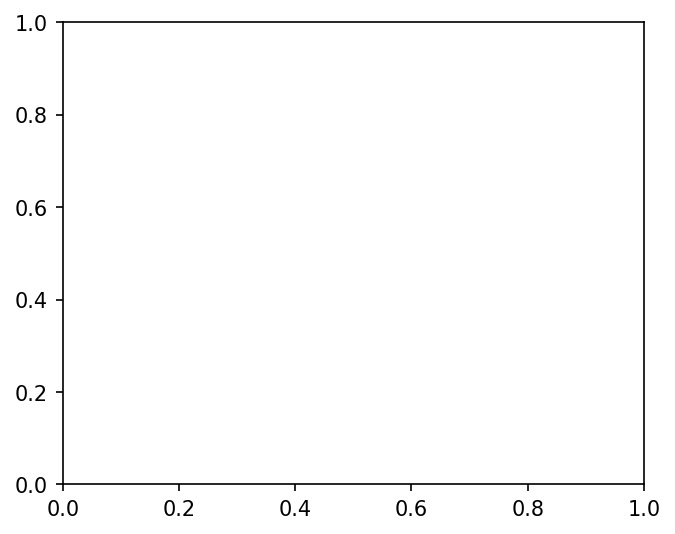

In [155]:
import matplotlib.pyplot as plt

width = 0.8  # the width of the bars
fig, ax = plt.subplots(1, 1, figsize=(5, 4), dpi=150)

labels = ['destroyed', 'major-damage', 'minor-damage', 'no-damage', 'un-classified']
y_values = [balanced.loc["Total", label] for label in labels]

for label, y in zip(labels, y_values):
    bar = ax.bar(label, y, width);
    ax.text(label, y / 2, f'{y:.0f}', ha='center', va='bottom');

ax.set_yscale('log')
ax.set_ylim(10**3, 10**5.6)
#ax.set_ylabel('Total buildings')
#_ = ax.set_title('xBD dataset building class distribution')
ax.set_ylabel('Total edificios')
_ = ax.set_title('Distribución de edificios por tipo de daño')
_ = ax.set_xticks(list(range(len(labels))))
_ = ax.set_xticklabels(labels, rotation=45)

In [ ]:
samp_df : pd.DataFrame = dmg_by_tile_df.copy()
samp_df

dis_id   tile_id  destroyed  major-damage  minor-damage  \
0        guatemala-volcano  00000004          4             8             6   
1        guatemala-volcano  00000012          0             0             0   
2        guatemala-volcano  00000014          1             5             0   
3        guatemala-volcano  00000020          0             0             8   
4        guatemala-volcano  00000022          2             1             0   
...                    ...       ...        ...           ...           ...   
11029  santa-rosa-wildfire  00000152          8             0             1   
11030  santa-rosa-wildfire  00000153          0             0             0   
11031  santa-rosa-wildfire  00000155        203             0             1   
11032  santa-rosa-wildfire  00000156          0             0             0   
11033  santa-rosa-wildfire  00000158         10             0             0   

       no-damage  un-classified  
0              2              0  
1             33              0  
2              0              1  
3             27              1  
4              4              0  
...          ...            ...  
11029          0              1  
11030         53              0  
11031         84              0  
11032         65              0  
11033          2              0  

[11034 rows x 7 columns]

El problema:
Necesito realizar un muestreo que cumpla las siguientes condiciones:
1. La cantidad de imágenes debe ser menor a 1000.
2. El total de edificios por cada imagen debe seguir una distribución uniforme.
3. El total de imágenes de cada desastre debe seguir una distribución uniforme.
4. El total de imágenes sin edificios por cada desastre debe seguir una distribución uniforme.

In [31]:
from random import choice
import numpy as np

# Parámetros del algoritmo
population_size = 12
chromosome_length = len(samp_df)
crossover_rate = 1
mutation_rate = 0.1
num_generations = 2000
max_true = 100

dmg_labels =  samp_df.columns[2:]
dis_labels = samp_df["dis_id"].value_counts().index

def fill_class(labels : list, ser : pd.Series):
    if(len(labels) != len(ser.index)):
        for lab in labels:
            if lab not in ser.index:
                ser[lab] = 0
    return ser

def compute_cv(labels, sample):
    if len(sample) > 0:
        sample = fill_class(labels, sample)
        mean = sample.mean()
        std_dev = sample.std()
        if (mean > 0.0):  
            cv = std_dev / mean
            return cv
    return 100
    
# Función de fitness
def fitness_function(index: np.ndarray) -> float:
    sample = samp_df.loc[index]
    # Calcular el desbalance de edificios por imagen
    bld_tot = sample.sum(axis=0, numeric_only=True)
    cv_bld = compute_cv(dmg_labels, bld_tot)   
    # Calcular la uniformidad de imágenes por desastre
    dis_tot = sample['dis_id'].value_counts()
    cv_dis = compute_cv(dis_labels, dis_tot)
    # Calcular la uniformidad de imágenes sin edificios por desastre
    empty_img = sample.groupby("dis_id").apply(
        lambda x: (x.sum(axis=1, numeric_only=True) == 0).sum(), include_groups=False
    )
    cv_img = compute_cv(dis_labels, empty_img)
    
    return (cv_bld + cv_dis + cv_img)
        
def get_chrom(chromosome_length):
    chromosome = np.zeros(chromosome_length, dtype=bool)
    true_indices = np.random.choice(chromosome_length, max_true, replace=False)
    chromosome[true_indices] = True
    return chromosome

# Inicialización de la población
def initialize_population(population_size, chromosome_length):
    return np.array([get_chrom(chromosome_length) for _ in range(population_size)])

# Evaluación de la población
def evaluate_population(population):
    fitness_values = np.array([fitness_function(chrom) for chrom in population])
    return fitness_values

# Selección por ruleta
def roulette_selection(population, fitness_values):
    total_fitness = np.sum(fitness_values)
    probabilities = fitness_values / total_fitness
    indices = np.arange(len(population))
    ids = np.random.choice(indices, size=len(population), p=probabilities)
    return population[ids]

def enforce_max_true(chromosome, max_true):
    # Asegura que el chromosome no tenga más de max_true verdaderos
    if np.sum(chromosome) > max_true:
        # Si hay más verdaderos de los permitidos, modifica el chromosome
        true_indices = np.where(chromosome)[0]
        # Elimina algunos verdaderos al azar
        indices_to_remove = np.random.choice(true_indices, np.sum(chromosome) - max_true, replace=False)
        chromosome[indices_to_remove] = False
    return chromosome

# Cruce de dos chromosomes
def crossover(parent1, parent2):
    if np.random.rand() < crossover_rate:
        point = np.random.randint(1, len(parent1))
        child1 = np.concatenate((parent1[:point], parent2[point:]))
        child2 = np.concatenate((parent2[:point], parent1[point:]))
        child1 = enforce_max_true(child1, max_true)
        child2 = enforce_max_true(child2, max_true)
        return child1, child2
    else:
        return parent1.copy(), parent2.copy()

def mutate(chromosome):
    # Aplicar la restricción después de la mutación
    np.random.shuffle(chromosome)
    chromosome = enforce_max_true(chromosome, max_true)
    return chromosome

# Algoritmo genético
def genetic_algorithm():
    population = initialize_population(population_size, chromosome_length)
    for generation in range(num_generations):
        fitness_values = evaluate_population(population)
        best_fitness = np.min(fitness_values)
        best_chromosome = population[np.argmin(fitness_values)]
        print(f'Generación {generation}: Mejor aptitud = {best_fitness}, chromosome = {best_chromosome.sum()}')

        selected_population = roulette_selection(population, fitness_values)
        new_population = []
        for i in range(0, population_size, 2):
            parent1 = selected_population[i]
            parent2 = selected_population[i + 1]
            child1, child2 = crossover(parent1, parent2)
            new_population.append(mutate(child1))
            new_population.append(mutate(child2))
        population = np.array(new_population)

    best_fitness = np.min(evaluate_population(population))
    best_chromosome = population[np.argmin(evaluate_population(population))]
    print(f'Final: Mejor aptitud = {best_fitness}, chromosome = {best_chromosome}, Valor decimal = {best_chromosome.sum()}')

genetic_algorithm()

Generación 0: Mejor aptitud = 4.084473363394007, chromosome = 100
Generación 1: Mejor aptitud = 4.161280648239325, chromosome = 100
Generación 2: Mejor aptitud = 3.9270963830145478, chromosome = 100
Generación 3: Mejor aptitud = 4.028430791798679, chromosome = 99
Generación 4: Mejor aptitud = 3.9139447263331055, chromosome = 95
Generación 5: Mejor aptitud = 3.9936304954494206, chromosome = 99
Generación 6: Mejor aptitud = 4.000048813998834, chromosome = 88
Generación 7: Mejor aptitud = 4.045871067311827, chromosome = 93
Generación 8: Mejor aptitud = 4.081970916937321, chromosome = 93
Generación 9: Mejor aptitud = 3.7014528741729125, chromosome = 91
Generación 10: Mejor aptitud = 3.8134137867407505, chromosome = 83
Generación 11: Mejor aptitud = 3.7756422461922576, chromosome = 100
Generación 12: Mejor aptitud = 3.7930119487203955, chromosome = 83
Generación 13: Mejor aptitud = 4.056217492841483, chromosome = 81
Generación 14: Mejor aptitud = 3.5173487948617854, chromosome = 98
Generaci

KeyboardInterrupt: 